<a href="https://colab.research.google.com/github/jcdumlao14/Homework-ml-zoomcamp/blob/main/02_Homework_Housing__Price_Prediction_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Linear Regression**

### Housing Prices Prediction

Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

In [ ]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').



# **Setup**

In [20]:
#@ Importing Libraries and Dependencies:  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


# **Exploratory Data Analysis**

* Load the data.



In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-26 10:59:11--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.009s  

2022-09-26 10:59:11 (159 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [4]:
print(df.shape)

(20640, 10)


In [5]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


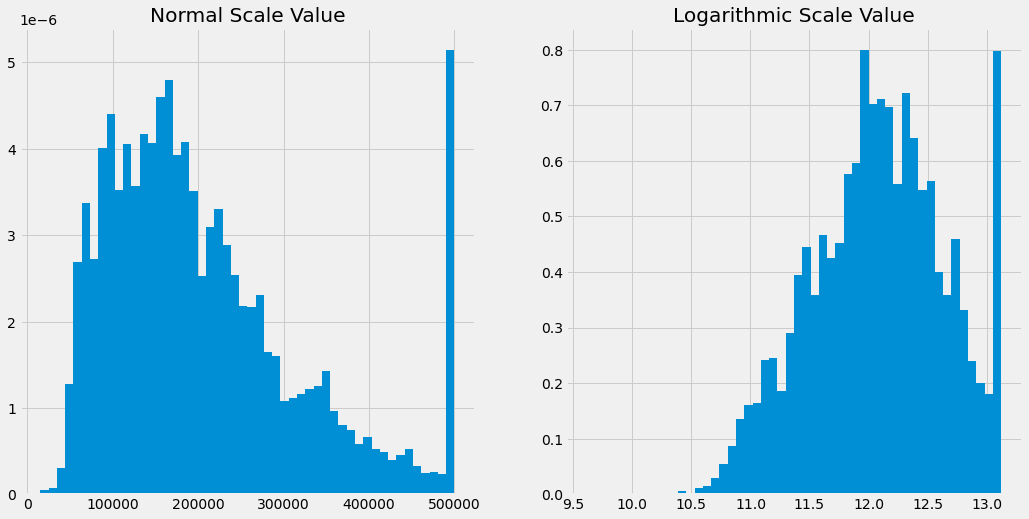

In [7]:
"""
Look at the median_house_value variable. Does it have a long tail? 
"""

fig,axes = plt.subplots(1,2)
axes[0].hist(df['median_house_value'], density = True, bins = 50)
axes[0].set_title('Normal Scale Value')

axes[1].hist(np.log1p(df['median_house_value']), density = True, bins = 50)
axes[1].set_title('Logarithmic Scale Value');

Features

For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value'

Select only them.

In [8]:
usecols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


In [9]:
df = pd.read_csv('housing.csv',usecols=usecols)

In [10]:
""" Print some of the statistics of each column """

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842



# **Question 1**

Find a feature with missing values. How many missing values does it have?

* 207
* 307
* 408
* 508


In [12]:
missing_vals = df.isnull().sum()
missing_vals.to_frame().reset_index().rename({'index':'Variables', 0: 'Missing Values'}, axis =1).sort_values(by = 'Missing Values', ascending = False).head(2).style.background_gradient('Blues')

,Variables,Missing Values
4,total_bedrooms,207
0,longitude,0


### **Answer:  207**

Null value checker

In [13]:
incomplete = df.isna().mean()*100
print(incomplete[incomplete > 0])

total_bedrooms    1.002907
dtype: float64


In [14]:
# Inspecting null values
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

## **Duplicates:**

In [15]:
df.duplicated().value_counts()

False    20640
dtype: int64

# **Question 2**

What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* 1166
* 1188


## **DESCRIPTIVE ANALYSIS:**

In [16]:
# Initialize Descriptive Analysis: 
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


In [ ]:
np.median(df['population'])

1166.0

### **Answer: 1166.0**

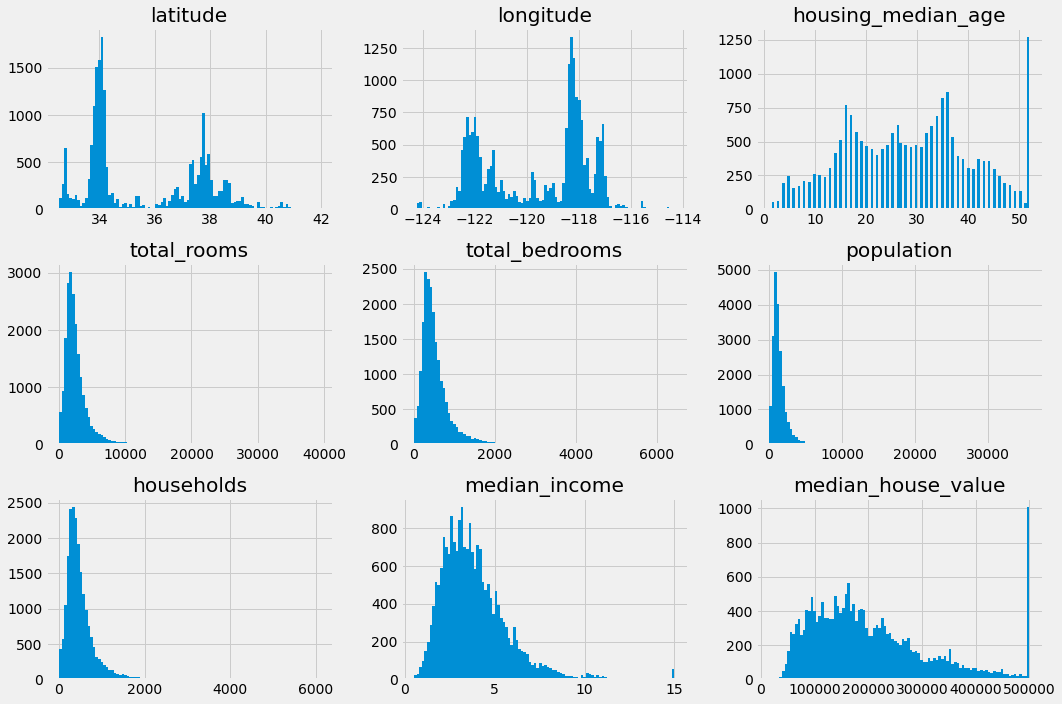

In [17]:
# Inspecting histogram:

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins =100, ax=ax, layout = (3,3), column = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])
plt.tight_layout()
plt.show()


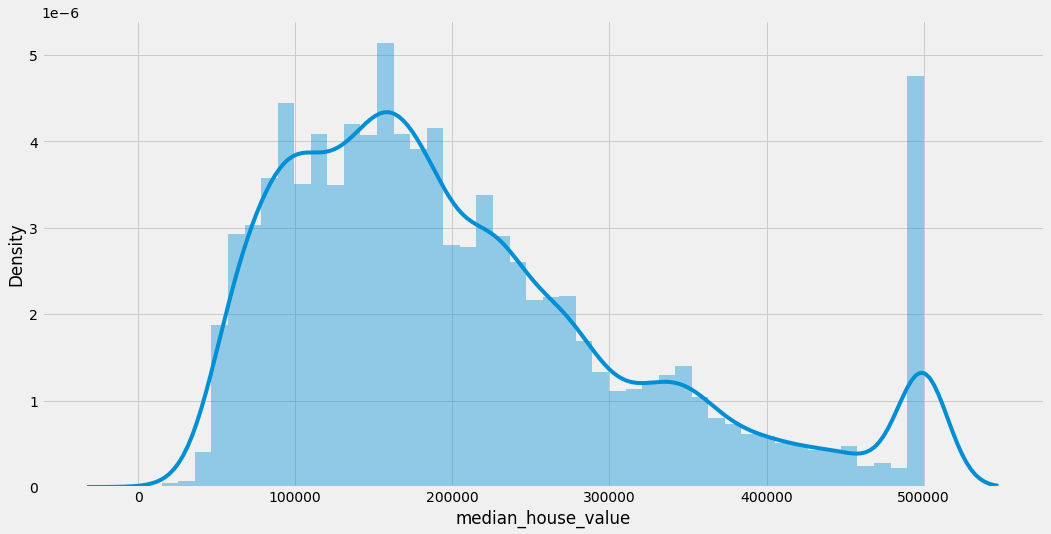

In [24]:
#@ inspecting house values:
sns.distplot(df.median_house_value)

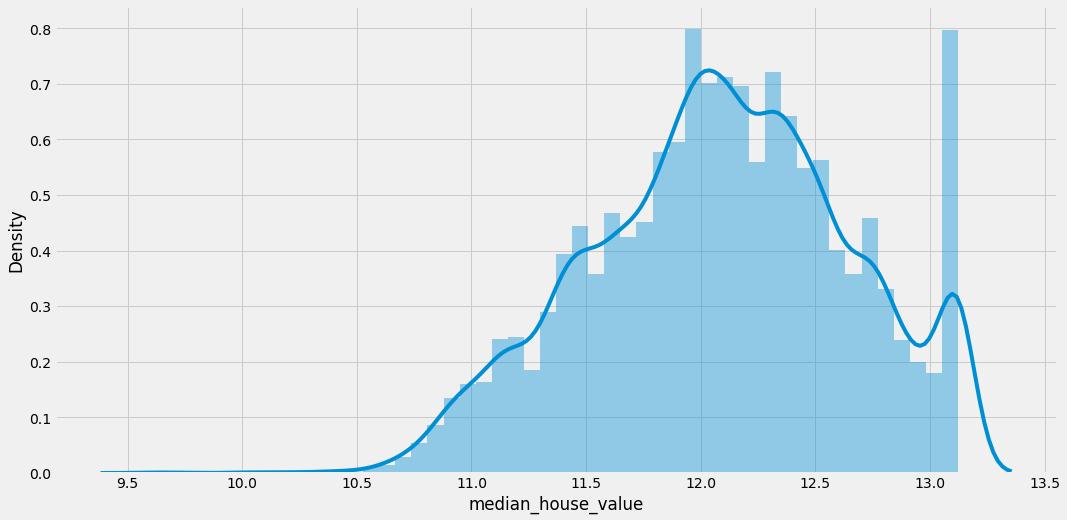

In [22]:
#@ Inspecting House Vaues: 
sns.distplot(np.log1p(df.median_house_value))

Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.


# **Simple Linear Regression:**

In [25]:
# Function for Linear Regression:  
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# **Data Preparation**

In [26]:
"""Split your data in train/val/test sets, with 60%/20%/20% distribution"""
# Spitting the Dataset: 
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# Shuffling Dataset  
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [27]:
# Preparing the Dataset:  
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

"""Dropping indexes now"""
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
# Preparing the Labels:   
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

"""Apply the log transformation to the median_house_value variable using the np.log1p() function"""
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [29]:
# check length of the three datasets
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [30]:
"""Make sure that the target value ('median_house_value') is not in your dataframe"""
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# **Question 3**

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the * RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* With median
* Both are equally good

In [31]:
# Check the dataset:
check=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

# Defining Function: 
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [32]:
# Function for RMSE Values: 
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
# Filling the Missing Values:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [34]:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)


In [35]:
# Getting RMSE Score:
np.round(rmse(y_val, y_mean_pred_val),2)

0.33

In [36]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [37]:
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [38]:
# Getting RMSE Score:
np.round(rmse(y_val, y_null_pred_val),2)

0.33

### **Answer: Both are equally good**

# **Question 4**

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001


## **Regularization**

In [39]:
"""Create a function for Training Linear Regression Regularization Model"""

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0]) # including a biased term
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram Matrix
    reg = r * np.eye(XTX.shape[0]) # Regularization
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX) #Inverse of Gram Matrix
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [40]:
# Inspecting the Results: 

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r) #Train a Regularized Linear Regression
    y_null_reg_val = w_0 + X_null_val.dot(w)# RMSE to evaluate the model on the validation dataset
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2) #Round the RMSE scores to 2 decimal digits
    print(r, w_0, rmse_val)

0 -11.686975242036546 0.33
1e-06 -11.686959175728921 0.33
0.0001 -11.685368865034667 0.33
0.001 -11.670931317799797 0.33
0.01 -11.528493585632091 0.33
0.1 -10.274500282195673 0.33
1 -4.920480897742212 0.33
5 -1.482095745621172 0.34
10 -0.7899311831779245 0.34


### **Answer:   0**

# **Question 5**

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))



> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.



Options:

* 0.16
* 0.00005
* 0.005
* 0.15555


In [41]:
# Checking the RMSE Score:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.900382138125133 0.34
1 -11.732757372921618 0.34
2 -11.806729361193014 0.33
3 -11.587900347753235 0.34
4 -11.38947058831824 0.34
5 -11.447114275587968 0.34
6 -11.370516351548385 0.35
7 -12.47344891889502 0.34
8 -11.800287429792748 0.35
9 -11.459046830736924 0.34


In [42]:
# Inspecting the RMSE List: INSPECTING THE RMSE LIST:
rmse_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [43]:
# Inspecting the RMSE:
np.round(np.std(rmse_list),3)

0.005

## **Answer: 0.005**

# **Question 6**

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245


## Seed and Regularization

In [44]:
# Initialize Seed and Regularization: 
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']


In [45]:
# Inspecting RMSE:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2) # RMSE on the test dataset

0.35

### **Answer: 0.35**

## Happy Learning!!!